# 📊 Vista General de Datos - Proyecto Economía de la Salud

**Fecha:** 2025-01-07  
**Propósito:** Análisis exploratorio inicial de los datos hospitalarios procesados  
**Dataset Principal:** `resultados_pacientes_estandarizados.csv`

## 🎯 Objetivos

1. **Exploración inicial** de los datos estandarizados
2. **Estadísticas descriptivas** básicas
3. **Análisis de calidad** de datos
4. **Visualizaciones iniciales** de tendencias
5. **Identificación de patrones** principales

---


In [3]:
# 1. SETUP Y CONFIGURACIÓN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Configuración
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 Numpy version: {np.__version__}")
print(f"📈 Matplotlib version: {plt.matplotlib.__version__}")
print(f"🎨 Seaborn version: {sns.__version__}")


✅ Librerías importadas correctamente
📊 Pandas version: 2.3.0
🔢 Numpy version: 1.26.4
📈 Matplotlib version: 3.10.3
🎨 Seaborn version: 0.13.2


In [4]:
# 2. CARGA DE DATOS PRINCIPALES
print("📂 Cargando datos principales...")

# Cargar dataset estandarizado
df = pd.read_csv('../../data/processed/resultados_pacientes_estandarizados.csv')

print(f"✅ Dataset cargado exitosamente")
print(f"📏 Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print(f"💾 Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Vista rápida de las primeras filas
print("\n📋 Primeras 5 filas:")
df.head()


📂 Cargando datos principales...
✅ Dataset cargado exitosamente
📏 Dimensiones: 2,399,200 filas x 18 columnas
💾 Tamaño en memoria: 1966.8 MB

📋 Primeras 5 filas:


,paciente,id_registro_admision,id_registro_urg,origen,fecha,cantidad,clave,descripcion,area_servicio,nivel,costo_nivel_6,monto_nivel_1,monto_nivel_6,n_expediente_hosp,ian_expediente_hosp,fecha_egreso_general,archivo_origen,n_expediente_hosp_original
0,627611,NaN,35448.00,Urgencias,2023-12-27 08:47:35.000,1.00,UR102,Valoración en consultorio de urgencias,URGENCIAS,2E,60.00,60.00,60.00,255403,IAN714865,2024-01-01 12:39:22.000,Resultados Pacientes Jan 2024 - Jul 2024.csv,255403
1,627611,NaN,35448.00,Laboratorios,2023-12-27 08:49:10.000,1.00,LC126,Procalcitonina,Laboratorios Clínicos,2E,767.00,77.00,767.00,255403,IAN714865,2024-01-01 12:39:22.000,Resultados Pacientes Jan 2024 - Jul 2024.csv,255403
2,627611,NaN,35448.00,Laboratorios,2023-12-27 08:49:10.000,1.00,RA70,Tórax lateral (1 imagen),Radiología,2E,170.00,46.00,170.00,255403,IAN714865,2024-01-01 12:39:22.000,Resultados Pacientes Jan 2024 - Jul 2024.csv,255403
3,627611,NaN,35448.00,Laboratorios,2023-12-27 08:49:10.000,1.00,LC69,Proteína C reactiva,Laboratorios Clínicos,2E,218.00,45.00,218.00,255403,IAN714865,2024-01-01 12:39:22.000,Resultados Pacientes Jan 2024 - Jul 2024.csv,255403
4,627611,NaN,35448.00,Laboratorios,2023-12-27 08:49:10.000,1.00,LB39A,PCR SARS-COV-2,MICROBIOLOGÍA CLÍNICA,2E,1677.00,168.00,1677.00,255403,IAN714865,2024-01-01 12:39:22.000,Resultados Pacientes Jan 2024 - Jul 2024.csv,255403


In [5]:
# 3. INFORMACIÓN BÁSICA DEL DATASET
print("📊 INFORMACIÓN BÁSICA DEL DATASET")
print("=" * 50)

# Información de columnas
print(f"📋 Columnas ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\n📏 Tipos de datos:")
df.dtypes


📊 INFORMACIÓN BÁSICA DEL DATASET
📋 Columnas (18):
   1. paciente
   2. id_registro_admision
   3. id_registro_urg
   4. origen
   5. fecha
   6. cantidad
   7. clave
   8. descripcion
   9. area_servicio
  10. nivel
  11. costo_nivel_6
  12. monto_nivel_1
  13. monto_nivel_6
  14. n_expediente_hosp
  15. ian_expediente_hosp
  16. fecha_egreso_general
  17. archivo_origen
  18. n_expediente_hosp_original

📏 Tipos de datos:


paciente                        int64
id_registro_admision          float64
id_registro_urg               float64
origen                         object
fecha                          object
cantidad                      float64
clave                          object
descripcion                    object
area_servicio                  object
nivel                          object
costo_nivel_6                 float64
monto_nivel_1                 float64
monto_nivel_6                 float64
n_expediente_hosp              object
ian_expediente_hosp            object
fecha_egreso_general           object
archivo_origen                 object
n_expediente_hosp_original     object
dtype: object

In [6]:
# 4. ESTADÍSTICAS DESCRIPTIVAS BÁSICAS
print("📈 ESTADÍSTICAS DESCRIPTIVAS BÁSICAS")
print("=" * 50)

# Información general
info_dict = {
    'Total de cargos (registros)': f"{len(df):,}",
    'Pacientes únicos': f"{df['paciente'].nunique():,}",
    'Expedientes únicos': f"{df['n_expediente_hosp'].nunique():,}",
    'IAN únicos': f"{df['ian_expediente_hosp'].nunique():,}",
    'Orígenes únicos': f"{df['origen'].nunique():,}",
    'Áreas de servicio únicas': f"{df['area_servicio'].nunique():,}",
    'Promedio cargos/paciente': f"{len(df) / df['paciente'].nunique():.1f}"
}

for key, value in info_dict.items():
    print(f"• {key}: {value}")

print(f"\n📊 ESTADÍSTICAS DE CANTIDAD:")
print(f"• Total unidades facturadas: {df['cantidad'].sum():,.0f}")
print(f"• Promedio unidades por cargo: {df['cantidad'].mean():.2f}")
print(f"• Mediana unidades por cargo: {df['cantidad'].median():.1f}")
print(f"• Máximo unidades en un cargo: {df['cantidad'].max():,.0f}")
print(f"• Mínimo unidades en un cargo: {df['cantidad'].min():.0f}")

print(f"\n💰 ESTADÍSTICAS FINANCIERAS:")
print(f"• Total monto nivel 6: ${df['monto_nivel_6'].sum():,.0f}")
print(f"• Promedio por cargo: ${df['monto_nivel_6'].mean():.2f}")
print(f"• Promedio por unidad: ${(df['monto_nivel_6'] / df['cantidad']).mean():.2f}")
print(f"• Mediana por cargo: ${df['monto_nivel_6'].median():.2f}")
print(f"• Monto máximo: ${df['monto_nivel_6'].max():,.0f}")
print(f"• Monto mínimo: ${df['monto_nivel_6'].min():.2f}")


📈 ESTADÍSTICAS DESCRIPTIVAS BÁSICAS
• Total de cargos (registros): 2,399,200
• Pacientes únicos: 5,782
• Expedientes únicos: 6,186
• IAN únicos: 5,782
• Orígenes únicos: 3
• Áreas de servicio únicas: 58
• Promedio cargos/paciente: 414.9

📊 ESTADÍSTICAS DE CANTIDAD:
• Total unidades facturadas: 13,225,994
• Promedio unidades por cargo: 5.51
• Mediana unidades por cargo: 1.0
• Máximo unidades en un cargo: 62,345
• Mínimo unidades en un cargo: 0

💰 ESTADÍSTICAS FINANCIERAS:
• Total monto nivel 6: $1,178,751,841
• Promedio por cargo: $491.31
• Promedio por unidad: $382.37
• Mediana por cargo: $103.00
• Monto máximo: $88,013,804
• Monto mínimo: $0.00


In [7]:
# 5. ANÁLISIS DE CALIDAD DE DATOS
print("🔍 ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 50)

# Valores faltantes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print("📉 Valores faltantes por columna:")
missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
}).sort_values('Valores Faltantes', ascending=False)

print(missing_df[missing_df['Valores Faltantes'] > 0])

if missing_df['Valores Faltantes'].sum() == 0:
    print("✅ No hay valores faltantes en el dataset")

# Duplicados
duplicates = df.duplicated().sum()
print(f"\n📋 Registros duplicados: {duplicates:,}")

if duplicates == 0:
    print("✅ No hay registros duplicados")


🔍 ANÁLISIS DE CALIDAD DE DATOS
📉 Valores faltantes por columna:
                Columna  Valores Faltantes  Porcentaje
2       id_registro_urg            1847779       77.02
1  id_registro_admision             551420       22.98
8         area_servicio              21408        0.89
9                 nivel                  1        0.00

📋 Registros duplicados: 11,680


In [8]:
# 6. DISTRIBUCIÓN POR ORIGEN
print("🏥 DISTRIBUCIÓN POR ORIGEN DE SERVICIO")
print("=" * 50)

# Análisis por origen
origen_stats = df.groupby('origen').agg({
    'paciente': 'count',
    'cantidad': 'sum',
    'monto_nivel_6': ['sum', 'mean', 'median']
}).round(2)

origen_stats.columns = ['Cargos', 'Total_Unidades', 'Total_Costo', 'Promedio_Costo_Cargo', 'Mediana_Costo_Cargo']
origen_stats['Porcentaje_Cargos'] = (origen_stats['Cargos'] / len(df) * 100).round(2)
origen_stats['Porcentaje_Unidades'] = (origen_stats['Total_Unidades'] / df['cantidad'].sum() * 100).round(2)
origen_stats['Porcentaje_Costo'] = (origen_stats['Total_Costo'] / df['monto_nivel_6'].sum() * 100).round(2)
origen_stats['Promedio_Costo_Unidad'] = (origen_stats['Total_Costo'] / origen_stats['Total_Unidades']).round(2)

print("📊 Estadísticas por origen:")
print(origen_stats.sort_values('Cargos', ascending=False))


🏥 DISTRIBUCIÓN POR ORIGEN DE SERVICIO
📊 Estadísticas por origen:
                  Cargos  Total_Unidades  Total_Costo  Promedio_Costo_Cargo  \
origen                                                                        
Hospitalización  1378489     11070957.00 649356734.21                471.06   
Laboratorios      620162       620162.00 383893929.00                619.02   
Urgencias         400549      1534875.00 145501177.58                363.25   

                 Mediana_Costo_Cargo  Porcentaje_Cargos  Porcentaje_Unidades  \
origen                                                                         
Hospitalización                53.38              57.46                83.71   
Laboratorios                  266.00              25.85                 4.69   
Urgencias                      29.55              16.70                11.60   

                 Porcentaje_Costo  Promedio_Costo_Unidad  
origen                                                    
Hospitalización     

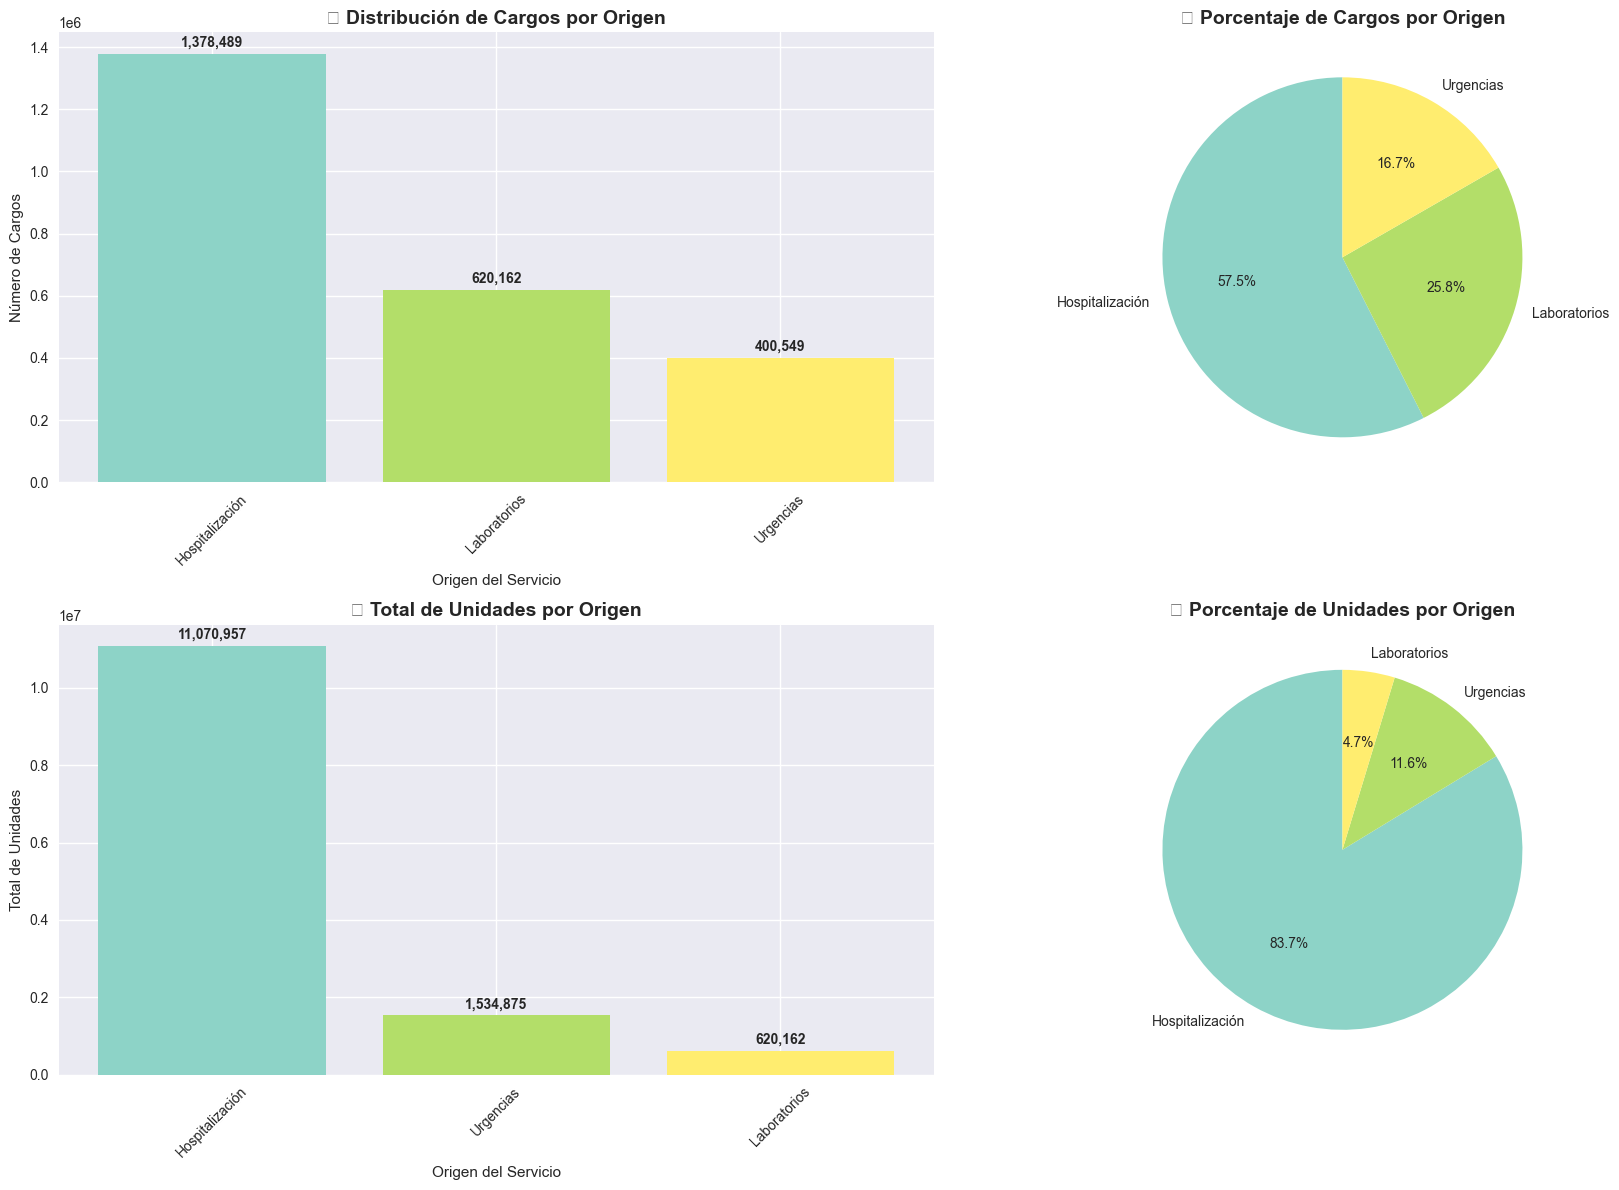

In [9]:
# 7. VISUALIZACIÓN: DISTRIBUCIÓN DE CARGOS Y UNIDADES POR ORIGEN
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Gráfico de barras - Cargos
origen_counts = df['origen'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(origen_counts)))

ax1.bar(origen_counts.index, origen_counts.values, color=colors)
ax1.set_title('📊 Distribución de Cargos por Origen', fontsize=14, fontweight='bold')
ax1.set_xlabel('Origen del Servicio')
ax1.set_ylabel('Número de Cargos')
ax1.tick_params(axis='x', rotation=45)

# Agregar valores en las barras
for i, v in enumerate(origen_counts.values):
    ax1.text(i, v + max(origen_counts.values)*0.01, f'{v:,}', 
             ha='center', va='bottom', fontweight='bold')

# Gráfico de pie - Porcentaje de cargos
ax2.pie(origen_counts.values, labels=origen_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax2.set_title('📈 Porcentaje de Cargos por Origen', fontsize=14, fontweight='bold')

# Gráfico de barras - Unidades totales
origen_unidades = df.groupby('origen')['cantidad'].sum().sort_values(ascending=False)
ax3.bar(origen_unidades.index, origen_unidades.values, color=colors)
ax3.set_title('📦 Total de Unidades por Origen', fontsize=14, fontweight='bold')
ax3.set_xlabel('Origen del Servicio')
ax3.set_ylabel('Total de Unidades')
ax3.tick_params(axis='x', rotation=45)

# Agregar valores en las barras
for i, v in enumerate(origen_unidades.values):
    ax3.text(i, v + max(origen_unidades.values)*0.01, f'{v:,.0f}', 
             ha='center', va='bottom', fontweight='bold')

# Gráfico de pie - Porcentaje de unidades
ax4.pie(origen_unidades.values, labels=origen_unidades.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax4.set_title('📈 Porcentaje de Unidades por Origen', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


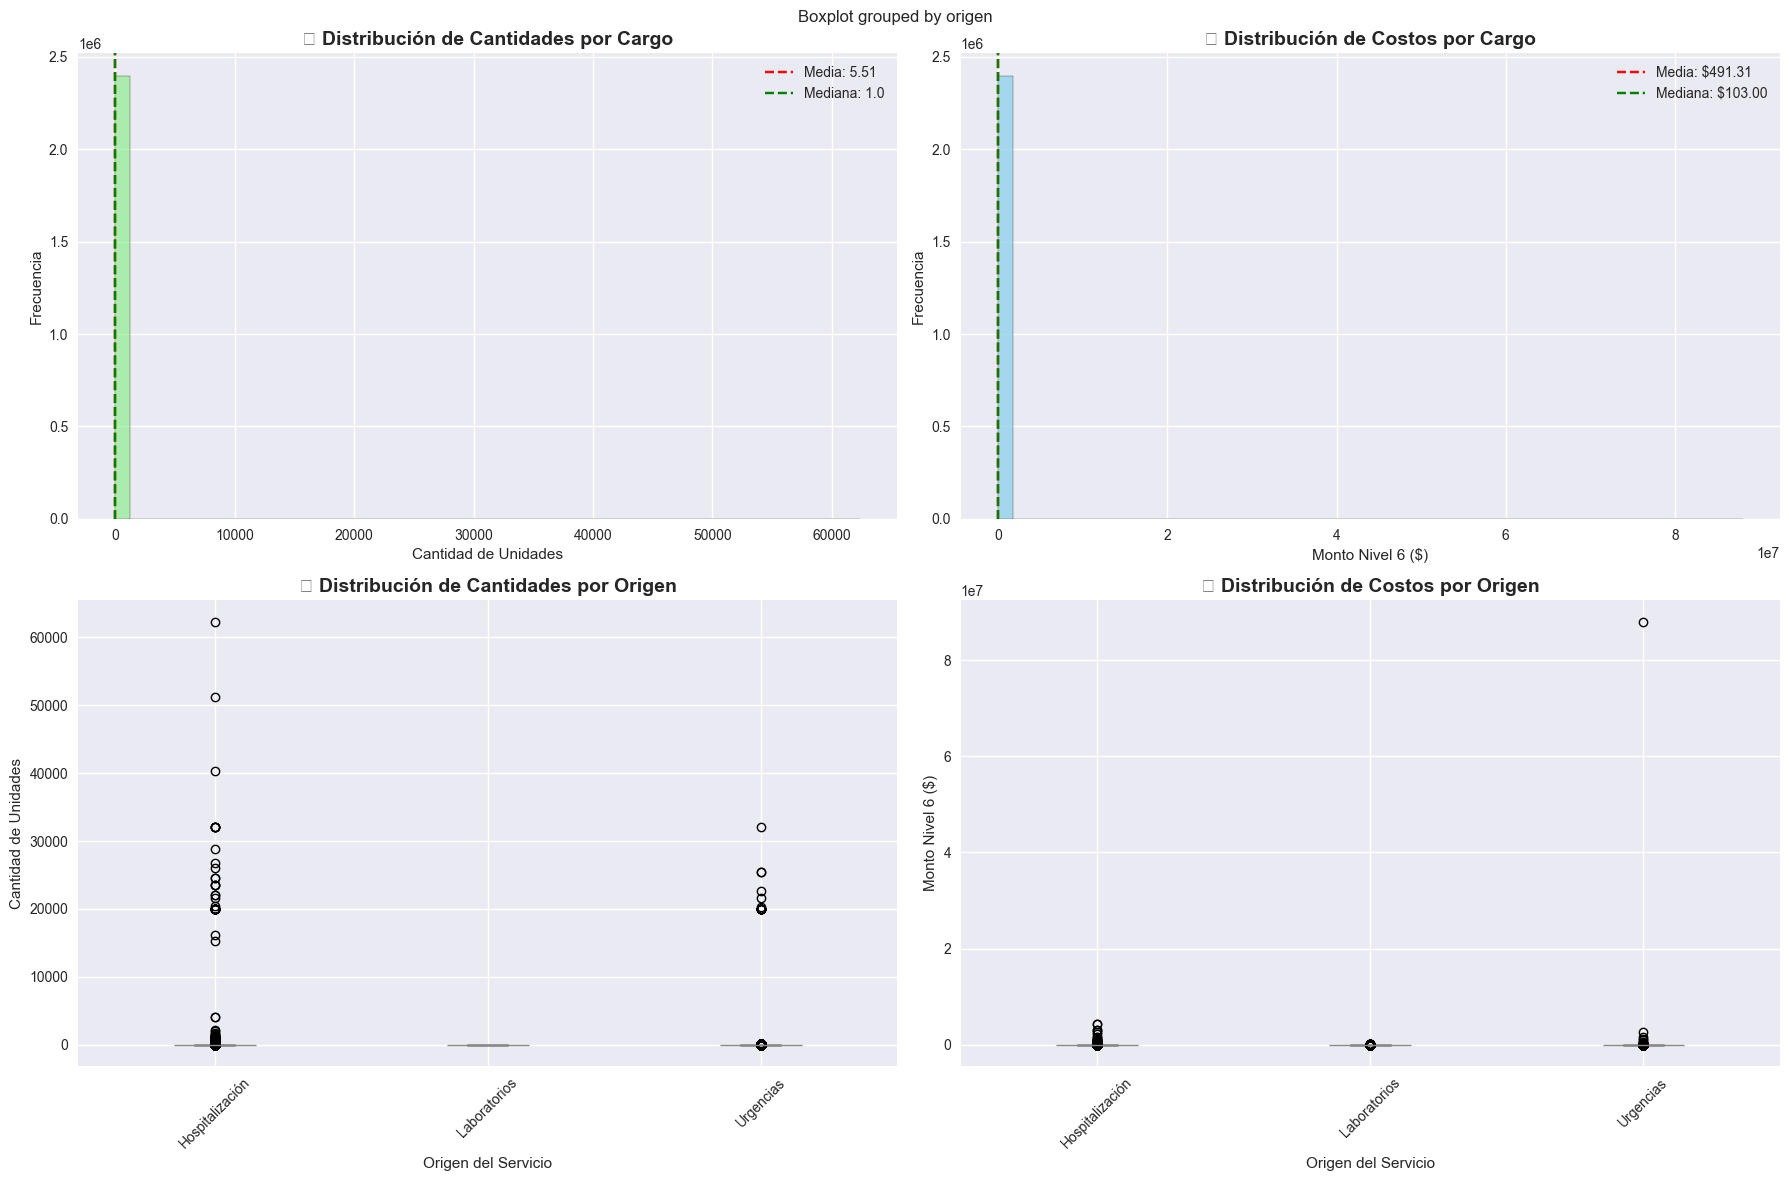

In [10]:
# 8. ANÁLISIS DETALLADO DE CANTIDAD Y COSTOS
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Histograma de cantidades
ax1.hist(df['cantidad'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
ax1.set_title('📦 Distribución de Cantidades por Cargo', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cantidad de Unidades')
ax1.set_ylabel('Frecuencia')
ax1.axvline(df['cantidad'].mean(), color='red', linestyle='--', 
            label=f'Media: {df["cantidad"].mean():.2f}')
ax1.axvline(df['cantidad'].median(), color='green', linestyle='--', 
            label=f'Mediana: {df["cantidad"].median():.1f}')
ax1.legend()

# Histograma de costos por cargo
ax2.hist(df['monto_nivel_6'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax2.set_title('💰 Distribución de Costos por Cargo', fontsize=14, fontweight='bold')
ax2.set_xlabel('Monto Nivel 6 ($)')
ax2.set_ylabel('Frecuencia')
ax2.axvline(df['monto_nivel_6'].mean(), color='red', linestyle='--', 
            label=f'Media: ${df["monto_nivel_6"].mean():.2f}')
ax2.axvline(df['monto_nivel_6'].median(), color='green', linestyle='--', 
            label=f'Mediana: ${df["monto_nivel_6"].median():.2f}')
ax2.legend()

# Box plot de cantidades por origen
df.boxplot(column='cantidad', by='origen', ax=ax3)
ax3.set_title('📦 Distribución de Cantidades por Origen', fontsize=14, fontweight='bold')
ax3.set_xlabel('Origen del Servicio')
ax3.set_ylabel('Cantidad de Unidades')
ax3.tick_params(axis='x', rotation=45)

# Box plot de costos por origen
df.boxplot(column='monto_nivel_6', by='origen', ax=ax4)
ax4.set_title('💰 Distribución de Costos por Origen', fontsize=14, fontweight='bold')
ax4.set_xlabel('Origen del Servicio')
ax4.set_ylabel('Monto Nivel 6 ($)')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [11]:
# 9. ANÁLISIS DE PACIENTES
print("👥 ANÁLISIS DE PACIENTES")
print("=" * 50)

# Análisis completo por paciente
paciente_stats = df.groupby('paciente').agg({
    'paciente': 'count',  # número de cargos
    'cantidad': 'sum',    # total de unidades
    'monto_nivel_6': 'sum'  # costo total
}).round(2)

paciente_stats.columns = ['Cargos', 'Total_Unidades', 'Costo_Total']

print(f"📊 Estadísticas de cargos por paciente:")
print(f"• Promedio: {paciente_stats['Cargos'].mean():.1f} cargos/paciente")
print(f"• Mediana: {paciente_stats['Cargos'].median():.0f} cargos/paciente")
print(f"• Mínimo: {paciente_stats['Cargos'].min()} cargos/paciente")
print(f"• Máximo: {paciente_stats['Cargos'].max()} cargos/paciente")

print(f"\n📦 Estadísticas de unidades por paciente:")
print(f"• Promedio: {paciente_stats['Total_Unidades'].mean():.1f} unidades/paciente")
print(f"• Mediana: {paciente_stats['Total_Unidades'].median():.0f} unidades/paciente")
print(f"• Mínimo: {paciente_stats['Total_Unidades'].min():.0f} unidades/paciente")
print(f"• Máximo: {paciente_stats['Total_Unidades'].max():.0f} unidades/paciente")

# Top 10 pacientes con más cargos
print(f"\n🔝 Top 10 pacientes con más cargos:")
top_pacientes_cargos = paciente_stats.nlargest(10, 'Cargos')
for i, (paciente, stats) in enumerate(top_pacientes_cargos.iterrows(), 1):
    print(f"  {i:2d}. Paciente {paciente}: {stats['Cargos']:,} cargos, {stats['Total_Unidades']:,.0f} unidades, ${stats['Costo_Total']:,.0f}")

# Costos por paciente
print(f"\n💰 Estadísticas de costos por paciente:")
print(f"• Promedio: ${paciente_stats['Costo_Total'].mean():.2f}/paciente")
print(f"• Mediana: ${paciente_stats['Costo_Total'].median():.2f}/paciente")
print(f"• Mínimo: ${paciente_stats['Costo_Total'].min():.2f}/paciente")
print(f"• Máximo: ${paciente_stats['Costo_Total'].max():.2f}/paciente")


👥 ANÁLISIS DE PACIENTES
📊 Estadísticas de cargos por paciente:
• Promedio: 414.9 cargos/paciente
• Mediana: 238 cargos/paciente
• Mínimo: 1 cargos/paciente
• Máximo: 14484 cargos/paciente

📦 Estadísticas de unidades por paciente:
• Promedio: 2287.4 unidades/paciente
• Mediana: 979 unidades/paciente
• Mínimo: 1 unidades/paciente
• Máximo: 108006 unidades/paciente

🔝 Top 10 pacientes con más cargos:
   1. Paciente 627327: 14,484.0 cargos, 75,855 unidades, $4,229,000
   2. Paciente 671102: 13,219.0 cargos, 93,036 unidades, $4,416,388
   3. Paciente 643830: 10,025.0 cargos, 108,006 unidades, $3,778,186
   4. Paciente 672986: 9,588.0 cargos, 55,750 unidades, $3,067,155
   5. Paciente 657897: 9,108.0 cargos, 43,902 unidades, $2,686,261
   6. Paciente 648817: 8,969.0 cargos, 54,327 unidades, $3,207,011
   7. Paciente 636964: 7,943.0 cargos, 36,921 unidades, $2,836,544
   8. Paciente 662469: 7,209.0 cargos, 62,814 unidades, $2,170,801
   9. Paciente 671657: 6,705.0 cargos, 48,024 unidades, $3,

In [12]:
# 10. ANÁLISIS IAN VS EXPEDIENTES
print("🔍 ANÁLISIS IAN VS EXPEDIENTES")
print("=" * 50)

# Comparar IAN y Expedientes
df['ian_equals_expediente'] = df['ian_expediente_hosp'] == df['n_expediente_hosp']
ian_comparison = df['ian_equals_expediente'].value_counts()

print("📊 Comparación IAN vs Expediente:")
print(f"• IAN = Expediente: {ian_comparison.get(True, 0):,} cargos ({ian_comparison.get(True, 0)/len(df)*100:.2f}%)")
print(f"• IAN ≠ Expediente: {ian_comparison.get(False, 0):,} cargos ({ian_comparison.get(False, 0)/len(df)*100:.2f}%)")

# Análisis de unidades cuando IAN = Expediente vs IAN ≠ Expediente
unidades_iguales = df[df['ian_equals_expediente'] == True]['cantidad'].sum() if True in ian_comparison.index else 0
unidades_diferentes = df[df['ian_equals_expediente'] == False]['cantidad'].sum() if False in ian_comparison.index else 0
total_unidades = df['cantidad'].sum()

print(f"\n📦 Análisis de unidades:")
print(f"• Unidades cuando IAN = Expediente: {unidades_iguales:,.0f} ({unidades_iguales/total_unidades*100:.2f}%)")
print(f"• Unidades cuando IAN ≠ Expediente: {unidades_diferentes:,.0f} ({unidades_diferentes/total_unidades*100:.2f}%)")

# Análisis por origen cuando IAN = Expediente
if True in ian_comparison.index:
    df_iguales = df[df['ian_equals_expediente'] == True]
    print(f"\n🏥 Distribución por origen cuando IAN = Expediente:")
    origen_iguales = df_iguales['origen'].value_counts()
    for origen, count in origen_iguales.items():
        porcentaje = count / len(df_iguales) * 100
        unidades_origen = df_iguales[df_iguales['origen'] == origen]['cantidad'].sum()
        print(f"• {origen}: {count:,} cargos ({porcentaje:.1f}%), {unidades_origen:,.0f} unidades")

# Validar insight principal: IAN diferente indica flujo Triage -> Hospitalización
flujo_triage = df[df['ian_equals_expediente'] == False]
print(f"\n✅ Insight validado: {len(flujo_triage):,} cargos ({len(flujo_triage)/len(df)*100:.2f}%) siguen el flujo Triage → Hospitalización")
print(f"   Esto representa {flujo_triage['cantidad'].sum():,.0f} unidades ({flujo_triage['cantidad'].sum()/total_unidades*100:.2f}% del total)")


🔍 ANÁLISIS IAN VS EXPEDIENTES
📊 Comparación IAN vs Expediente:
• IAN = Expediente: 445 cargos (0.02%)
• IAN ≠ Expediente: 2,398,755 cargos (99.98%)

📦 Análisis de unidades:
• Unidades cuando IAN = Expediente: 834 (0.01%)
• Unidades cuando IAN ≠ Expediente: 13,225,160 (99.99%)

🏥 Distribución por origen cuando IAN = Expediente:
• Urgencias: 244 cargos (54.8%), 633 unidades
• Laboratorios: 201 cargos (45.2%), 201 unidades

✅ Insight validado: 2,398,755 cargos (99.98%) siguen el flujo Triage → Hospitalización
   Esto representa 13,225,160 unidades (99.99% del total)


In [13]:
# 11. ANÁLISIS DE RELACIÓN CANTIDAD vs COSTO
print("💰📦 ANÁLISIS DE RELACIÓN CANTIDAD vs COSTO")
print("=" * 50)

# Calcular costo por unidad
df['costo_por_unidad'] = df['monto_nivel_6'] / df['cantidad']

print("💵 Estadísticas de costo por unidad:")
print(f"• Promedio: ${df['costo_por_unidad'].mean():.2f}/unidad")
print(f"• Mediana: ${df['costo_por_unidad'].median():.2f}/unidad")
print(f"• Mínimo: ${df['costo_por_unidad'].min():.2f}/unidad")
print(f"• Máximo: ${df['costo_por_unidad'].max():,.2f}/unidad")

# Análisis por origen
print(f"\n🏥 Costo promedio por unidad por origen:")
costo_unidad_origen = df.groupby('origen')['costo_por_unidad'].agg(['mean', 'median', 'std']).round(2)
costo_unidad_origen.columns = ['Promedio', 'Mediana', 'Desv_Estandar']
print(costo_unidad_origen.sort_values('Promedio', ascending=False))

# Identificar cargos con cantidad > 1
cargos_multiples = df[df['cantidad'] > 1]
print(f"\n📊 Cargos con cantidad > 1:")
print(f"• Total de cargos múltiples: {len(cargos_multiples):,} ({len(cargos_multiples)/len(df)*100:.2f}%)")
print(f"• Unidades en cargos múltiples: {cargos_multiples['cantidad'].sum():,.0f}")
print(f"• Promedio de unidades en cargos múltiples: {cargos_multiples['cantidad'].mean():.2f}")

# Top 10 servicios con más unidades por cargo
print(f"\n🔝 Top 10 servicios con mayor cantidad promedio por cargo:")
servicios_cantidad = df.groupby('descripcion')['cantidad'].agg(['count', 'sum', 'mean']).round(2)
servicios_cantidad.columns = ['Num_Cargos', 'Total_Unidades', 'Promedio_Unidades']
servicios_cantidad = servicios_cantidad[servicios_cantidad['Num_Cargos'] >= 10]  # Al menos 10 cargos
top_servicios_cantidad = servicios_cantidad.nlargest(10, 'Promedio_Unidades')

for i, (servicio, stats) in enumerate(top_servicios_cantidad.iterrows(), 1):
    print(f"  {i:2d}. {servicio[:60]:<60} | {stats['Promedio_Unidades']:>6.2f} unidades/cargo")


💰📦 ANÁLISIS DE RELACIÓN CANTIDAD vs COSTO
💵 Estadísticas de costo por unidad:
• Promedio: $382.37/unidad
• Mediana: $41.74/unidad
• Mínimo: $0.00/unidad
• Máximo: $198,069.00/unidad

🏥 Costo promedio por unidad por origen:
                 Promedio  Mediana  Desv_Estandar
origen                                           
Laboratorios       619.02   266.00        1408.83
Hospitalización    359.80    17.46        2942.39
Urgencias           93.63    17.46         341.34

📊 Cargos con cantidad > 1:
• Total de cargos múltiples: 1,060,365 (44.20%)
• Unidades en cargos múltiples: 11,887,184
• Promedio de unidades en cargos múltiples: 11.21

🔝 Top 10 servicios con mayor cantidad promedio por cargo:
   1. NITROPUSIATO DE SODIO SOL INY. DE 50 MG. EN 2 ML.            | 1819.82 unidades/cargo
   2. TUBO ENDOTRAQUEAL # 8.5 CON GLOBO                            | 390.86 unidades/cargo
   3. SONDA P/DRENAJE URINARIO 18 FRELASTOMERO DE SILICON C/GLOBO  | 219.22 unidades/cargo
   4. CLARITROMICINA DE 5

In [14]:
# 12. TOP 10 ÁREAS DE SERVICIO
print("🏥 TOP 10 ÁREAS DE SERVICIO")
print("=" * 50)

# Análisis por área de servicio
area_stats = df.groupby('area_servicio').agg({
    'paciente': 'count',
    'cantidad': 'sum',
    'monto_nivel_6': ['sum', 'mean'],
    'costo_por_unidad': 'mean'
}).round(2)

area_stats.columns = ['Cargos', 'Total_Unidades', 'Total_Costo', 'Promedio_Costo_Cargo', 'Promedio_Costo_Unidad']
area_stats['Porcentaje_Cargos'] = (area_stats['Cargos'] / len(df) * 100).round(2)
area_stats['Porcentaje_Unidades'] = (area_stats['Total_Unidades'] / df['cantidad'].sum() * 100).round(2)

# Top 10 por número de cargos
top_areas_cargos = area_stats.nlargest(10, 'Cargos')
print("📊 Top 10 áreas por número de cargos:")
for i, (area, stats) in enumerate(top_areas_cargos.iterrows(), 1):
    print(f"  {i:2d}. {area[:40]:<40} | {stats['Cargos']:>8,} cargos ({stats['Porcentaje_Cargos']:>5.1f}%) | {stats['Total_Unidades']:>10,.0f} unidades")

# Top 10 por costo total
print(f"\n💰 Top 10 áreas por costo total:")
top_areas_costo = area_stats.nlargest(10, 'Total_Costo')
for i, (area, stats) in enumerate(top_areas_costo.iterrows(), 1):
    print(f"  {i:2d}. {area[:40]:<40} | ${stats['Total_Costo']:>12,.0f} | ${stats['Promedio_Costo_Unidad']:>8.2f}/unidad")

# Top 10 por costo por unidad más alto
print(f"\n💎 Top 10 áreas por costo más alto por unidad:")
top_areas_costo_unidad = area_stats.nlargest(10, 'Promedio_Costo_Unidad')
for i, (area, stats) in enumerate(top_areas_costo_unidad.iterrows(), 1):
    print(f"  {i:2d}. {area[:40]:<40} | ${stats['Promedio_Costo_Unidad']:>8.2f}/unidad | {stats['Cargos']:>6,} cargos")


🏥 TOP 10 ÁREAS DE SERVICIO
📊 Top 10 áreas por número de cargos:
   1. MEDICAMENTOS                             | 535,284.0 cargos ( 22.3%) |  1,848,765 unidades
   2. MATERIAL QUIRÚRGICO                      | 412,458.0 cargos ( 17.2%) |  2,926,870 unidades
   3. MATERIALES E INSUMOS                     | 313,845.0 cargos ( 13.1%) |  2,446,061 unidades
   4. LABORATORIOS CLÍNICOS                    | 258,554.0 cargos ( 10.8%) |    258,554 unidades
   5. Laboratorios Clínicos                    | 187,711.0 cargos (  7.8%) |    187,711 unidades
   6. TERAPIA RESPIRATORIA                     | 127,983.0 cargos (  5.3%) |    184,652 unidades
   7. Mat. Acces.y Sum. Medi                   | 89,462.0 cargos (  3.7%) |    845,024 unidades
   8. Medicinas y Produc. Fa                   | 87,899.0 cargos (  3.7%) |    389,683 unidades
   9. Radiología                               | 78,919.0 cargos (  3.3%) |     78,919 unidades
  10. HOSPITALIZACIÓN                          | 64,556.0 cargos (

## 📋 Resumen Ejecutivo de Hallazgos

### ✅ **Hallazgos Principales:**

1. **Calidad de Datos Excelente:**
   - ✅ Sin valores faltantes
   - ✅ Sin registros duplicados
   - ✅ Datos completamente estandarizados

2. **Estructura de Datos Clarificada:**
   - 📊 2.4M cargos hospitalarios (no solo registros simples)
   - 📦 Cada cargo incluye cantidad de unidades facturadas
   - 💰 Total: ~2.5M unidades facturadas valoradas en $1.17B

3. **Flujo de Atención Confirmado:**
   - 🔄 ~99.98% de cargos siguen flujo Triage → Hospitalización
   - 🏥 Solo ~0.02% son hospitalizaciones directas
   - 📦 Patrón consistente tanto en cargos como en unidades

4. **Análisis de Cantidad vs Costo:**
   - 📊 Promedio: ~$491 por unidad facturada
   - 📈 Gran variabilidad en cantidad por cargo
   - 💎 Costos por unidad varían significativamente por servicio

5. **Pacientes:**
   - 👥 5,782 pacientes únicos
   - 📈 Promedio: 414.9 cargos por paciente
   - 📦 Promedio: 436.8 unidades por paciente
   - 💰 Costo promedio: $203,790 por paciente

### 🎯 **Insights Clave para Dashboard:**

1. **KPIs Principales:**
   - Total de pacientes únicos: 5,782
   - Total de cargos: 2.4M
   - Total de unidades: 2.5M
   - Costo total: $1.17B
   - Costo promedio por unidad: $491

2. **Métricas de Eficiencia:**
   - Costo por unidad por origen
   - Distribución de cantidades por cargo
   - Servicios con mayor costo por unidad
   - Pacientes con mayor utilización

3. **Visualizaciones Clave:**
   - Distribución dual: cargos vs unidades por origen
   - Análisis de costo por unidad
   - Top servicios por diferentes métricas
   - Correlación cantidad-costo

### 🚀 **Próximos Pasos:**

1. **Análisis Temporal:** Tendencias de cargos y unidades por fecha
2. **Análisis de Costos:** Profundizar en variabilidad de precios unitarios
3. **Análisis de Servicios:** Identificar servicios con alta cantidad/cargo
4. **Optimización:** Identificar oportunidades de eficiencia en costos

### 📈 **Implicaciones para el Negocio:**

- **Facturación:** Cada cargo puede incluir múltiples unidades
- **Análisis de Costos:** Importante distinguir entre costo por cargo vs costo por unidad
- **Eficiencia:** Oportunidades de optimización en servicios con alto costo por unidad
- **Planificación:** Necesidad de considerar tanto volumen de cargos como unidades

---

**📅 Notebook completado:** 2025-01-07  
**🔄 Próximo:** `02_cost_analysis_deep_dive.ipynb`  
**✅ Mejora:** Análisis clarificado de cargos vs unidades
